In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

juegos = pd.read_csv('/content/drive/MyDrive/CDD/7mo/Big Data/juegos.csv')
reviews = pd.read_csv('/content/drive/MyDrive/CDD/7mo/Big Data/reviews.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedtarek01234/steam-games-reviews-and-rankings")

print("Path to dataset files:", path)

100%|██████████| 166M/166M [00:01<00:00, 144MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohamedtarek01234/steam-games-reviews-and-rankings/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/mohamedtarek01234/steam-games-reviews-and-rankings/versions/1

games_description.csv  games_ranking.csv  steam_game_reviews.csv


# Lectura

In [ ]:
games_description = pd.read_csv('/root/.cache/kagglehub/datasets/mohamedtarek01234/steam-games-reviews-and-rankings/versions/1/games_description.csv')
games_description

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,MXGP PRO,Adjust your bike's configuration like a mechan...,About This Game\n\t\t\t\t\t\t\tThe official vi...,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"29 Jun, 2018",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(777),433,https://store.steampowered.com/app/798290/MXGP...
286,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,About This Game\n\t\t\t\t\t\t\tThe official Mo...,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"27 Aug, 2019",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(90% of 858) All Time,446,https://store.steampowered.com/app/1018160/MXG...
287,Ride 2,The fastest and most iconic bikes in the world...,About This Game\n\t\t\t\t\t\t\tWelcome to the ...,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,"7 Oct, 2016",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,"(86% of 2,335) All Time","1,045",https://store.steampowered.com/app/477770/Ride...
288,Tanuki Sunset,Master the longboard as you drift through stun...,About This Game\nGrab Your Longboard and Race ...,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","4 Dec, 2020",['Rewind Games'],['Rewind Games'],Very Posit

In [ ]:
games_ranking = pd.read_csv('/root/.cache/kagglehub/datasets/mohamedtarek01234/steam-games-reviews-and-rankings/versions/1/games_ranking.csv')
games_ranking

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5
...,...,...,...,...
667,MXGP PRO,Sports & Racing,Review,36
668,MXGP 2019 - The Official Motocross Videogame,Sports & Racing,Review,37
669,Ride 2,Sports & Racing,Review,38
670,Tanuki Sunset,Sports & Racing,Review,39


# Filtrado Demográfico

In [ ]:
games_ranking['game_name'].duplicated().sum()

369

In [ ]:
def demographic_recommendation(genre: str = None, rank_type: str = None, num_games: int = 5):
  recommendations = games_ranking.copy()
  if genre and genre not in recommendations['genre'].unique():
    print('Género no encontrado')
    return None

  if genre:
    recommendations = recommendations[recommendations['genre'] == genre]

  if rank_type and rank_type not in recommendations['rank_type'].unique():
    print('Tipo de ranking no encontrado')
    return None

  if rank_type:
    recommendations = recommendations[recommendations['rank_type'] == rank_type]

  recommendations = recommendations.sort_values(by= 'rank', ascending=True).drop_duplicates(subset='game_name')
  return recommendations.head(num_games).drop(columns=['rank_type', 'rank'])

In [ ]:
demographic_recommendation(num_games=5)

,game_name,genre
0,Counter-Strike 2,Action
472,Crusader Kings III,Strategy
36,"Warhammer 40,000: Space Marine 2",Action
312,EA SPORTS FC™ 25,Simulation
632,All-In-One Sports VR,Sports & Racing


In [ ]:
demographic_recommendation(genre= 'Action', num_games=5)

,game_name,genre
0,Counter-Strike 2,Action
36,"Warhammer 40,000: Space Marine 2",Action
77,Grand Theft Auto V,Action
37,Black Myth: Wukong,Action
2,Cyberpunk 2077,Action


In [ ]:
demographic_recommendation(genre= 'Simulation')

,game_name,genre
312,EA SPORTS FC™ 25,Simulation
392,Garry's Mod,Simulation
313,Frostpunk 2,Simulation
393,Stardew Valley,Simulation
314,TCG Card Shop Simulator,Simulation


In [ ]:
demographic_recommendation(genre= 'Adventure', rank_type='Revenue')

,game_name,genre
156,"Warhammer 40,000: Space Marine 2",Adventure
157,Black Myth: Wukong,Adventure
158,Baldur's Gate 3,Adventure
159,Satisfactory,Adventure
160,Once Human,Adventure


# Content-based recommendation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from typing import Iterable

In [ ]:
games_description = games_description.drop(columns = ['link', 'long_description'])

In [ ]:
games_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   short_description                        277 non-null    object
 2   genres                                   290 non-null    object
 3   minimum_system_requirement               290 non-null    object
 4   recommend_system_requirement             290 non-null    object
 5   release_date                             290 non-null    object
 6   developer                                290 non-null    object
 7   publisher                                290 non-null    object
 8   overall_player_rating                    290 non-null    object
 9   number_of_reviews_from_purchased_people  290 non-null    object
 10  number_of_english_reviews                290 non-null    objec

In [ ]:
games_description.columns

Index(['name', 'short_description', 'genres', 'minimum_system_requirement',
       'recommend_system_requirement', 'release_date', 'developer',
       'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')

In [ ]:
import re
listas = ['genres', 'minimum_system_requirement',
       'recommend_system_requirement', 'developer',
       'publisher']
for col in listas:
    games_description[col] = games_description[col].\
          apply(lambda x: re.sub(r'[^\w\s0-9,-]', '', str(x))\
             .split(', '))

In [ ]:
for col in listas:
  games_description[col] = games_description[col]\
      .apply(lambda x: [y.strip() if len(x)>0 else ['None'] for y in x])
games_description

,name,short_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,"[Mythology, Action RPG, Action, RPG, Souls-lik...",[Requires a 64-bit processor and operating sys...,[Requires a 64-bit processor and operating sys...,"19 Aug, 2024",[Game Science],[Game Science],Overwhelmingly Positive,"(654,820)","51,931"
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...","[FPS, Shooter, Multiplayer, Competitive, Actio...","[OS Windows 10, Processor 4 hardware CPU threa...","[OS Windows 10, Processor 4 hardware CPU threa...","21 Aug, 2012",[Valve],[Valve],Very Positive,"(8,313,603)","2,258,990"
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,"[Warhammer 40K, Action, Third-Person Shooter, ...",[Requires a 64-bit processor and operating sys...,[Requires a 64-bit processor and operating sys...,"9 Sep, 2024",[Saber Interactive],[Focus Entertainment],Very Positive,"(81% of 62,791) All Time","51,920"
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...","[Cyberpunk, Open World, Nudity, RPG, Singlepla...",[Requires a 64-bit processor and operating sys...,[Requires a 64-bit processor and operating sys...,"10 Dec, 2020",[CD PROJEKT RED],[CD PROJEKT RED],Very Positive,"(680,264)","324,124"
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,"[Souls-like, Dark Fantasy, Open World, RPG, Di...",[Requires a 64-bit processor and operating sys...,[Requires a 64-bit processor and operating sys...,"25 Feb, 2022","[FromSoftware, Inc]","[FromSoftware, Inc, Bandai Namco Entertainment]",Very Positive,"(705,261)","491,741"
...,...,...,...,...,...,...,...,...,...,...,...
285,MXGP PRO,Adjust your bike's configuration like a mechan...,"[Simulation, Racing, Sports, Motocross, Motorb...",[Requires a 64-bit processor and operating sys...,[Requires a 64-bit processor and operating sys...,"29 Jun, 2018",[Milestone Srl],[Milestone Srl],Very Positive,(777),433
286,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,"[Simulation, Racing, Sports, Motorbike, Motocr...",[Requires a 64-bit processor and operating sys...,[Requires a 64-bit processor and operating sys...,"27 Aug, 2019",[Milestone Srl],[Milestone Srl],Very Positive,(90% of 858) All Time,446
287,Ride 2,The fastest and most iconic bikes in the world...,"[Racing, Sports, Simulation, Motorbike, Bikes,...",[OS Windows 7 SP1 Windows 8 Windows 81 Win...,[OS Windows 7 SP1 64-Bit Windows 8 64-Bit W...,"7 Oct, 2016",[Milestone Srl],[Milestone Srl],Very Positive,"(86% of 2,335) All Time","1,045"
288,Tanuki Sunset,Master the longboard as you drift through stun...,"[Racing, Action, Indie, Sports, Adventure, Ska...","[OS Windows 7 32-bit, Processor Dual Core 24G...","[OS Windows 7 32-bit, Processor Dual Core 24G...","4 Dec, 2020",[Rewind Games],[Rewind Games],Very Positive,(93% of 420) All Time,451


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

binarizers = {}
dummies = pd.DataFrame()
for col in listas:
  binarizers[col] = dict(
      binarizer = MultiLabelBinarizer()
  )
  dummies = pd.concat([dummies,
                       pd.DataFrame(
                           data= binarizers[col]['binarizer'].fit_transform(games_description[col]),
                           columns=[col+'_'+x for x in binarizers[col]['binarizer'].classes_])],
                      axis=1)

dummies = dummies.set_index(games_description.index)
dummies

,genres_1980s,genres_1990s,genres_25D,genres_2D,genres_2D Fighter,genres_2D Platformer,genres_3D,genres_3D Fighter,genres_3D Platformer,genres_3D Vision,...,publisher_Xbox Game Studios,publisher_Zeekerss,publisher_hyperparadise,publisher_iRacing,publisher_iRacingcom Motorsport Simulations,publisher_indieio,publisher_poncle,publisher_tobspr Games,publisher_tobyfox,publisher_方块游戏 Asia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
muy_vacias = [x for x in dummies.columns if (np.mean(dummies[x]) < 0.05)]
dummies = dummies.drop(columns=muy_vacias)
dummies.shape

(290, 114)

In [ ]:
games_description = games_description.drop(columns=listas)

In [ ]:
def limpiar(x: str):
  x = re.sub(r'\d+%', '', x)
  x = re.sub(r'[^0-9]', '', x)
  if not x:
    return 0
  return int(x)

In [ ]:
limpiar('(81% of 62,791) All Time')

62791

In [ ]:
games_description['number_of_reviews_from_purchased_people'] = games_description['number_of_reviews_from_purchased_people']\
  .apply(limpiar)

In [ ]:
games_description['number_of_english_reviews'] = games_description['number_of_english_reviews']\
  .apply(limpiar)

In [ ]:
rating = {
          'Overwhelmingly Positive': 4,
          'Very Positive': 3,
          'Mostly Positive': 2,
          'Positive': 1,
          'Mixed': 0,
          'Mostly Negative': -2,
          'Very Negative': -4,
          }

In [ ]:
games_description['overall_player_rating'] = games_description['overall_player_rating'].map(rating).fillna(0)

In [ ]:
games_description

,name,short_description,release_date,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,"19 Aug, 2024",4.0,654820,51931
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...","21 Aug, 2012",3.0,8313603,2258990
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,"9 Sep, 2024",3.0,62791,51920
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...","10 Dec, 2020",3.0,680264,324124
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,"25 Feb, 2022",3.0,705261,491741
...,...,...,...,...,...,...
285,MXGP PRO,Adjust your bike's configuration like a mechan...,"29 Jun, 2018",3.0,777,433
286,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,"27 Aug, 2019",3.0,858,446
287,Ride 2,The fastest and most iconic bikes in the world...,"7 Oct, 2016",3.0,2335,1045
288,Tanuki Sunset,Master the longboard as you drift through stun...,"4 Dec, 2020",3.0,420,451


In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(games_description['short_description'].fillna(''))

In [ ]:
tfidf_matrix.shape

(290, 100)

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df

,action,adventure,age,alien,award,based,battle,battles,best,build,...,thrilling,time,tracks,turn,ultimate,unique,war,way,winning,world
0,0.549099,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.405786,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.323077,0.351312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.234301
4,0.434937,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.427025,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
286,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.285139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.466299
288,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
games_description.dtypes

,0
name,object
short_description,object
release_date,object
overall_player_rating,float64
number_of_reviews_from_purchased_people,int64
number_of_english_reviews,int64


In [ ]:
# Escalar variables
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

include = ['overall_player_rating', 'number_of_reviews_from_purchased_people', 'number_of_english_reviews']
X = mms.fit_transform(games_description[include])
X = pd.DataFrame(X, columns=include)

content_recommendation_df = pd.concat([X,
                                       tfidf_df,
                                       dummies], axis=1)
content_recommendation_df

,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,action,adventure,age,alien,award,based,battle,...,recommend_system_requirement_Memory 16 GB RAM,recommend_system_requirement_Memory 4 GB RAM,recommend_system_requirement_Memory 8 GB RAM,recommend_system_requirement_Network Broadband Internet connection,recommend_system_requirement_OS Windows 10,recommend_system_requirement_OS Windows 10 64-bit,recommend_system_requirement_Requires a 64-bit processor and operating system,recommend_system_requirement_Storage 50 GB available space,publisher_Electronic Arts,publisher_SEGA
0,1.000,0.078765,0.022989,0.549099,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,1,0,0,0
1,0.875,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
2,0.875,0.007553,0.022984,0.405786,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
3,0.875,0.081825,0.143482,0.323077,0.351312,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,0.875,0.084832,0.217682,0.434937,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.875,0.000093,0.000192,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
286,0.875,0.000103,0.000197,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,1,0,0,0
287,0.875,0.000281,0.000463,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
288,0.875,0.000051,0.000200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Distancia coseno
cosine_sim = cosine_similarity(content_recommendation_df, content_recommendation_df)
cosine_sim

array([[1.        , 0.15734302, 0.5286576 , ..., 0.15095925, 0.25852061,
        0.29059657],
       [0.15734302, 1.        , 0.27031154, ..., 0.22781289, 0.2286979 ,
        0.16955413],
       [0.5286576 , 0.27031154, 1.        , ..., 0.19876393, 0.18548068,
        0.38613658],
       ...,
       [0.15095925, 0.22781289, 0.19876393, ..., 1.        , 0.38407342,
        0.52376569],
       [0.25852061, 0.2286979 , 0.18548068, ..., 0.38407342, 1.        ,
        0.43772981],
       [0.29059657, 0.16955413, 0.38613658, ..., 0.52376569, 0.43772981,
        1.        ]])

In [ ]:
games_description

,name,short_description,release_date,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,"19 Aug, 2024",4.0,654820,51931
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...","21 Aug, 2012",3.0,8313603,2258990
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,"9 Sep, 2024",3.0,62791,51920
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...","10 Dec, 2020",3.0,680264,324124
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,"25 Feb, 2022",3.0,705261,491741
...,...,...,...,...,...,...
285,MXGP PRO,Adjust your bike's configuration like a mechan...,"29 Jun, 2018",3.0,777,433
286,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,"27 Aug, 2019",3.0,858,446
287,Ride 2,The fastest and most iconic bikes in the world...,"7 Oct, 2016",3.0,2335,1045
288,Tanuki Sunset,Master the longboard as you drift through stun...,"4 Dec, 2020",3.0,420,451


In [ ]:
def content_recommendation(game_name: str | Iterable, num_games: int = 5):
    if not game_name or game_name not in games_description['name'].values:
        print('Juego no encontrado')
        return None

    # Obtén el índice del juego que coincide con el AppID
    idx = games_description[games_description['name'] == game_name].index[0]

    # Calcula los puntajes de similitud
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_games+1]

    # Obtén los índices de los juegos más similares
    game_indices = [i[0] for i in sim_scores]
    recommendations = games_description[['name']].iloc[game_indices]
    recommendations['similarity_score'] = [i[1] for i in sim_scores]
    # Retorna los AppIDs y nombres de los juegos más similares
    return recommendations

In [ ]:
content_recommendation('Grand Theft Auto V')

,name,similarity_score
42,Red Dead Redemption 2,0.626305
119,Fallout 4,0.618272
14,Grounded,0.612353
24,The Crew™ 2,0.610913
137,BeamNG.drive,0.609748


In [ ]:
content_recommendation('Warhammer 40,000: Space Marine 2')

,name,similarity_score
76,FINAL FANTASY VII REMAKE INTERGRADE,0.679107
73,Dragon's Dogma 2,0.633255
67,Resident Evil 4,0.623526
35,ELDEN RING Shadow of the Erdtree,0.607558
23,Call of Duty®: Modern Warfare® III - BlackCell...,0.590584


In [ ]:
content_recommendation('Cyberpunk 2077')

,name,similarity_score
10,Cyberpunk 2077: Phantom Liberty,0.797648
114,Hogwarts Legacy,0.718585
119,Fallout 4,0.701796
79,STAR WARS Jedi: Survivor™,0.659435
107,Visions of Mana,0.658451


# Factores

In [ ]:
!pip install --upgrade factor_analyzer

Prueba de Bartlett:
Estadístico: 61232.22294745233, p-valor: 0.0

Medida KMO (Kaiser-Meyer-Olkin):
KMO general: 0.3312397770297044


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


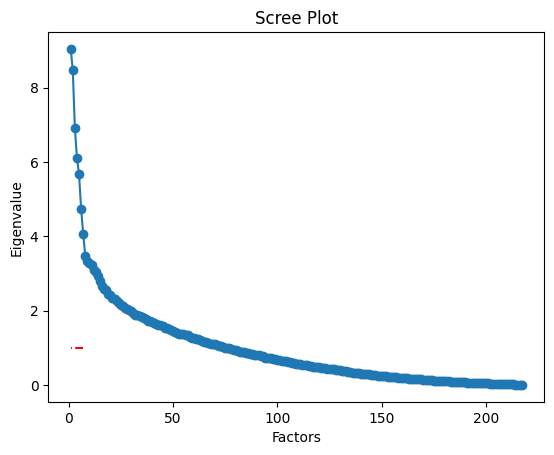


Cargas Factoriales:
                                                    Factor 0  Factor 1  \
overall_player_rating                              -0.054320  0.050035   
number_of_reviews_from_purchased_people            -0.041744 -0.033395   
number_of_english_reviews                          -0.056662 -0.065556   
action                                             -0.175756 -0.134080   
adventure                                          -0.140874 -0.144732   
...                                                      ...       ...   
recommend_system_requirement_OS Windows 10 64-bit   0.071346  0.016723   
recommend_system_requirement_Requires a 64-bit ... -0.136587  0.077055   
recommend_system_requirement_Storage 50 GB avai... -0.023844 -0.020595   
publisher_Electronic Arts                          -0.101366 -0.079977   
publisher_SEGA                                      0.422186 -0.079332   

                                                    Factor 2  Factor 3  \
overall_player_r

In [ ]:
from factor_analyzer import FactorAnalyzer

# Paso 1: Verificar si los datos son adecuados para análisis factorial
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

bartlett_test, bartlett_p_value = calculate_bartlett_sphericity(content_recommendation_df)
print("Prueba de Bartlett:")
print(f"Estadístico: {bartlett_test}, p-valor: {bartlett_p_value}")

kmo_all, kmo_model = calculate_kmo(content_recommendation_df)
print("\nMedida KMO (Kaiser-Meyer-Olkin):")
print(f"KMO general: {kmo_model}")

# Paso 2: Aplicar Análisis Factorial
factores = 20
fa = FactorAnalyzer(n_factors=factores, rotation='varimax')
fa.fit(content_recommendation_df)

# Graficar resultados
import matplotlib.pyplot as plt
ev, v = fa.get_eigenvalues()

# Graficamos la solución
plt.scatter(range(1,content_recommendation_df.shape[1]+1),ev)
plt.plot(range(1,content_recommendation_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.hlines(y = 1, xmax=1, xmin=7, color='r', linestyles='--')
plt.show()

# Verificar cargas factoriales
factor_loadings = pd.DataFrame(fa.loadings_, columns=[f"Factor {i}" for i in range(factores)], index=content_recommendation_df.columns)
print("\nCargas Factoriales:")
print(factor_loadings)

# Paso 3: Verificar comunalidades (qué tan bien están explicadas las variables)
comunalidades = pd.DataFrame(fa.get_communalities(), columns=["Comunalidad"], index=content_recommendation_df.columns)
print("\nComunalidades:")
print(comunalidades)

# Paso 4: Varianza explicada por los factores
varianza_explicada = pd.DataFrame(
    fa.get_factor_variance(),
    index=["Varianza explicada", "Varianza proporcional", "Varianza acumulada"],
    columns=[f"Factor {i}" for i in range(factores)]
)
print("\nVarianza explicada por cada factor:")
print(varianza_explicada)

In [ ]:
for i in range(factores):
  print(f"Variables en el factor {i+1}:")
  variables = factor_loadings.iloc[:, i].sort_values(ascending=False).where(lambda x: abs(x)>0.5).dropna()
  if len(variables) <= 1:
    variables = factor_loadings.iloc[:, i].sort_values(ascending=False, key=lambda x: abs(x)).head(3)
  print(variables, '\n\n')

Variables en el factor 1:
genres_Turn-Based Strategy    0.725163
genres_Grand Strategy         0.714372
genres_War                    0.645468
genres_Tactical               0.599323
genres_Strategy               0.524550
genres_Turn-Based             0.517781
genres_RTS                    0.500299
Name: Factor 0, dtype: float64 


Variables en el factor 2:
genres_Resource Management    0.728979
genres_Management             0.714506
genres_City Builder           0.709103
genres_Economy                0.623347
genres_Building               0.531549
genres_Base Building          0.510277
Name: Factor 1, dtype: float64 


Variables en el factor 3:
genres_Local Multiplayer    0.682392
genres_Local Co-Op          0.666954
genres_eSports              0.531980
Name: Factor 2, dtype: float64 


Variables en el factor 4:
genres_Racing      -0.581051
ride               -0.581973
genres_Bikes       -0.750048
genres_Motorbike   -0.815206
Name: Factor 3, dtype: float64 


Variables en el factor 5:


In [ ]:
content_recommendation_df.shape

(290, 217)

# Colaborative Filtering

In [ ]:
reviews = pd.read_csv('/root/.cache/kagglehub/datasets/mohamedtarek01234/steam-games-reviews-and-rankings/versions/1/steam_game_reviews.csv')
reviews

<ipython-input-198-627063bf6f47>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('/root/.cache/kagglehub/datasets/mohamedtarek01234/steam-games-reviews-and-rankings/versions/1/steam_game_reviews.csv')


,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account
...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,"Fatal Exit\n1,902 products in account"
992149,2022 Early Access Review Great fun!,8.5,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,cleybaR
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,Recommended,"August 4, 2022",Turbo Golf Racing,Sim\n600 products in account
992151,2022 Early Access Review This game is so much ...,3.8,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,Fatboybadboy


In [ ]:
reviews.columns

Index(['review', 'hours_played', 'helpful', 'funny', 'recommendation', 'date',
       'game_name', 'username'],
      dtype='object')

In [ ]:
reviews.dropna(inplace=True)
reviews['username'] = reviews['username'].apply(lambda x: x.split('\n')[0])

recommendation = {
    'Recommended': 1,
    'Not Recommended': 0
}

reviews['recommendation'] = reviews['recommendation'].map(recommendation)

In [ ]:
reviews

,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,1,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl
1,Never cared much about Warhammer until this ga...,91.5,712,116,1,13 September,"Warhammer 40,000: Space Marine 2",userpig
2,A salute to all the fallen battle brothers who...,43.3,492,33,1,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r
3,this game feels like it was made in the mid 20...,16.8,661,15,1,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,1,12 September,"Warhammer 40,000: Space Marine 2",Jek
...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,1,"August 4, 2022",Turbo Golf Racing,Fatal Exit
992149,2022 Early Access Review Great fun!,8.5,1,0,1,"August 4, 2022",Turbo Golf Racing,cleybaR
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,1,"August 4, 2022",Turbo Golf Racing,Sim
992151,2022 Early Access Review This game is so much ...,3.8,1,0,1,"August 4, 2022",Turbo Golf Racing,Fatboybadboy


In [ ]:
reviews.duplicated(subset= ['game_name', 'username']).sum()

7022

In [ ]:
reviews.drop_duplicates(subset= ['game_name', 'username'], inplace=True)

In [ ]:
reviews

,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,1,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl
1,Never cared much about Warhammer until this ga...,91.5,712,116,1,13 September,"Warhammer 40,000: Space Marine 2",userpig
2,A salute to all the fallen battle brothers who...,43.3,492,33,1,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r
3,this game feels like it was made in the mid 20...,16.8,661,15,1,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,1,12 September,"Warhammer 40,000: Space Marine 2",Jek
...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,1,"August 4, 2022",Turbo Golf Racing,Fatal Exit
992149,2022 Early Access Review Great fun!,8.5,1,0,1,"August 4, 2022",Turbo Golf Racing,cleybaR
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,1,"August 4, 2022",Turbo Golf Racing,Sim
992151,2022 Early Access Review This game is so much ...,3.8,1,0,1,"August 4, 2022",Turbo Golf Racing,Fatboybadboy


In [ ]:
# reviews = reviews.pivot(index='game_name', columns='username', values='recommendation')
# reviews

In [ ]:
# reviews.fillna(0, inplace=True)
# reviews

In [ ]:
!pip install scikit-surprise

In [ ]:
reviews.columns

Index(['review', 'hours_played', 'helpful', 'funny', 'recommendation', 'date',
       'game_name', 'username'],
      dtype='object')

In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Crear el dataset para Surprise
reader = Reader(rating_scale=(0, 1))  # Ajusta la escala de las valoraciones
data = Dataset.load_from_df(reviews[['username', 'game_name', 'recommendation']], reader)

# Dividir los datos en entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Entrenar el modelo SVD
model = SVD()
model.fit(trainset)

# Evaluar el modelo
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

RMSE: 0.3442
RMSE: 0.3442140203013151


In [ ]:
def collab_filter_recommendation(username: str, num_games: int = 5):
    all_games = reviews['game_name'].unique()
    rated_games = reviews[reviews['username'] == username]
    print(f'Juegos calificados por {username}:')
    display(rated_games[['game_name', 'recommendation']])
    unrated_games = [game for game in all_games if game not in rated_games['game_name'].values]

    recommendations = [
        (game_name, model.predict(username, game_name).est) for game_name in unrated_games
    ]
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:num_games]

    # Mostrar los mejores juegos recomendados
    print(f"\nTop {num_games} juegos recomendados para {username}:")
    for game_name, score in recommendations:
        print(f"Juego ID: {game_name}, Puntuación estimada: {score:.2f}")

In [ ]:
collab_filter_recommendation('Alex')

Juegos calificados por Alex:


,game_name,recommendation
5317,Black Myth: Wukong,0
7179,Counter-Strike 2,1
11148,ELDEN RING,1
14671,Total War: WARHAMMER III,0
21648,Once Human,0
...,...,...
947334,Descenders,1
954287,Golf It!,1
965370,Walkabout Mini Golf VR,1
990062,Lonely Mountains: Downhill,1



Top 5 juegos recomendados para Alex:
Juego ID: Shawarma Legend, Puntuación estimada: 1.00
Juego ID: Motordoom, Puntuación estimada: 1.00
Juego ID: 69 Balls, Puntuación estimada: 1.00
Juego ID: Totally Accurate Battle Simulator, Puntuación estimada: 0.98
Juego ID: TCG Card Shop Simulator, Puntuación estimada: 0.98


In [ ]:
collab_filter_recommendation('Shadow')

Juegos calificados por Shadow:


,game_name,recommendation
2223,"Warhammer 40,000: Space Marine 2",0
4133,Black Myth: Wukong,1
18897,Once Human,0
24062,NARAKA: BLADEPOINT,1
29052,Party Animals,0
...,...,...
965572,Walkabout Mini Golf VR,0
969527,Skater XL - The Ultimate Skateboarding Game,1
974672,Wrestling Empire,1
990797,Lonely Mountains: Downhill,1



Top 5 juegos recomendados para Shadow:
Juego ID: Golf Peaks, Puntuación estimada: 0.96
Juego ID: Vampire Survivors, Puntuación estimada: 0.90
Juego ID: People Playground, Puntuación estimada: 0.90
Juego ID: My Summer Car, Puntuación estimada: 0.90
Juego ID: Hades, Puntuación estimada: 0.90


In [ ]:
collab_filter_recommendation('tankanidis')

Juegos calificados por tankanidis:


,game_name,recommendation
149254,Terraria,0
223139,Vampire Survivors,1



Top 5 juegos recomendados para tankanidis:
Juego ID: 69 Balls, Puntuación estimada: 0.94
Juego ID: Dale & Dawson Stationery Supplies, Puntuación estimada: 0.91
Juego ID: People Playground, Puntuación estimada: 0.91
Juego ID: Slime Rancher, Puntuación estimada: 0.91
Juego ID: GP Bikes, Puntuación estimada: 0.91


In [ ]:
collab_filter_recommendation('Saul')

Juegos calificados por Saul:


,game_name,recommendation
172010,Among Us,1
299420,Subnautica,1
353444,God of War,1
411586,Stardew Valley,1
643242,Kerbal Space Program,1
711741,Age of Mythology: Retold,1
787624,Balatro,1
836790,Stacklands,1
952483,TrackDayR,1



Top 5 juegos recomendados para Saul:
Juego ID: Noita, Puntuación estimada: 1.00
Juego ID: Wallpaper Engine, Puntuación estimada: 1.00
Juego ID: Gunfire Reborn, Puntuación estimada: 1.00
Juego ID: Terraria, Puntuación estimada: 1.00
Juego ID: Left 4 Dead 2, Puntuación estimada: 1.00


In [ ]:
collab_filter_recommendation('Sebastian')

Juegos calificados por Sebastian:


,game_name,recommendation
10966,ELDEN RING,1
129937,Team Fortress 2,1
152593,Left 4 Dead 2,1
158866,The Forest,1
198830,Unturned,1
277111,Little Nightmares II,1
285865,Sonic Frontiers,1
363163,Life is Strange - Episode 1,1
442915,Fallout 76,1
447165,Summoners War,0



Top 5 juegos recomendados para Sebastian:
Juego ID: Gunfire Reborn, Puntuación estimada: 1.00
Juego ID: Portal 2, Puntuación estimada: 1.00
Juego ID: Hades, Puntuación estimada: 1.00
Juego ID: Hollow Knight, Puntuación estimada: 1.00
Juego ID: Dying Light, Puntuación estimada: 1.00


In [ ]:
reviews.sample(10)

,review,hours_played,helpful,funny,recommendation,date,game_name,username
705331,"2018 um, i found a glitch in the kindergarden ...",100.1,1,0,1,"June 16, 2018",House Flipper,briandragonflame
229196,2023 Product received for free Many have said ...,78.1,2,0,1,"April 8, 2023",Resident Evil 4,Captain Jameson
141974,"2020 Wonderful game with rich story, amazing c...",70.3,2,0,1,"November 25, 2020",Red Dead Redemption 2,Eternity
134244,2020 Early Access Review When Borderlands beco...,16.0,1,0,1,"November 28, 2020",Gunfire Reborn,ﭢҒɛתґ∂ﭲłﭢ
657296,2022 Early Access Review EXCELLENT GAME,178.8,1,0,1,"May 10, 2022",Dyson Sphere Program,ShuJia
413263,"2020 This game is addicting, adorable, and has...",388.9,3,1,1,"March 20, 2020",Stardew Valley,Happy Emmie
149254,"What a pointless update, pandering to those wh...",0.3,30,0,0,August 15,Terraria,tankanidis
54106,2023 Product received for free Here I will lea...,394.6,730,23,1,"August 26, 2023",Tom Clancy's Rainbow Six® Siege,archie.
960747,2018 Good game but there are many things wrong...,10.8,0,0,0,"March 29, 2018",Steep™,Limamufu
306290,Early Access Review Same as old game I clocked...,203.4,3,0,0,February 9,ARK: Survival Ascended,Owen


In [ ]:
reviews['username'].value_counts()

,count
username,
Alex,135
Ghost,132
󠀡󠀡,127
.,127
Shadow,118
...,...
DiZ,1
*IncognitoOmen*,1
Polly Affliction,1


In [ ]:
games_ranking.shape

(672, 4)

In [ ]:
games_ranking['genre'].value_counts()

,count
genre,
Simulation,120
Strategy,120
Sports & Racing,120
Action,116
Role-Playing,104
Adventure,92


In [ ]:
games_ranking['rank_type'].value_counts()

,count
rank_type,
Revenue,240
Sales,220
Review,212
